# Cyber Attack Classification

 ## Step 1: Explore the dataset to understand the characteristics and distributions of different features.

In [1]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('Dataset.txt', delimiter=',')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
# shape
df.shape

(125973, 43)

In [4]:
# check the data types of the columns
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
# check for missing values in the dataset
df.isnull().values.any()

False

In [6]:
# check duplicates in the dataset
df.duplicated().values.any()

False

In [7]:
# print the summary of the dataset
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Step 3: The dataset provided to you contains 23 different classes (attack types). You need to convert it to 5-classes. 
Hint: See the file “Attack_types.txt”

In [8]:


# Convert the attack type column to 5 classes
dff = pd.read_csv('Attack_types.txt',delimiter=' ')
df2 = dict([(i,x) for i, x in zip(dff.attack_category, dff.attack_type)])
df2['normal']='normal' # adding normal category in dict
#print(df2)
df['Attack_type'] = df['attack_category'].map(df2)
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,Attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,dos
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,dos
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,dos
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,dos
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,dos


## Step 2: Perform data preprocessing on the dataset by cleaning the data, handling missing values, outliers, and feature scaling.



In [9]:
#FEATURE ENGINEERING
# STEP 1: Features like Protocol type , service & flag  are categorical convert them into numerical values

#STEP 2: Scale numerical features: Features such as "duration", "src_bytes", and "dst_bytes", have different scales and ranges of values. Scaling these features to a common range (e.g., between 0 and 1)

#STEP 3: Remove irrelevant features:  the  "num_outbound_cmds" features have the same value for all records and therefore do not provide any information for classification.

In [10]:
#removing column which has single value because it will contribute nothing toward finding target
a= df["num_outbound_cmds"]
print(np.unique(a))

df = df.drop("num_outbound_cmds", axis= 1)

[0]


In [11]:
# As we saw on step 1 we checked for missing values but in whole dataset there are no missing values

# Before using outliers we first have to handle our categorical data in dataset and convert it in numerical one

# create a label encoder object
le = LabelEncoder()
# loop through each categorical column and transform it
for column in df.select_dtypes(include=['object']).columns:
    #print(df[column])
    df[column] = le.fit_transform(df[column])

df.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,Attack_type
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20,1
1,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15,1
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21,1
5,0,1,49,1,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,9,21,0
6,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,21,0
7,0,1,49,5,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,9,21,0
8,0,1,51,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,21,0
9,0,1,49,5,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9,21,0


In [12]:
#df.shape[1]
#df[:, 1]
#df.iloc[:, 1]
# df[df.columns[:-1]]
# df.columns

In [13]:
#OUTLIERS 


#finding Outliers and replacing with median

for i in range(df.shape[1]):
    #select column from dataframe in feature variable
    feature = df.iloc[:, i]
    
    #finding median and standard deviation of each feature as z score = (X-median/std)
    median = np.median(feature) 
    std = np.std(feature) 
    z_score = np.abs((feature - median) / std)
    
    # threshold z-score value is 3 it can be change as per requirement using 3 as it is standard
    outliers = z_score > 3
    
    feature[outliers] = median
    df.iloc[:, i] = feature

df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_13308\4084909612.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[outliers] = median


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,Attack_type
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20,1
1,0,2,44,9,146,0,0,0,0,0,...,0.02,0.88,0.00,0.00,0.00,0.00,0.00,11,15,1
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21,1


In [14]:
# scale the features using StandardScaler
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

In [15]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,Attack_type
0,-0.098691,-0.124706,-0.686785,0.750736,-0.045884,-0.040884,0.0,0.0,0.0,-0.10551,...,-0.177682,0.732531,-0.359248,-0.639532,-0.624871,0.152459,-0.128881,0.195484,0.154479,1
1,-0.098691,2.219312,0.781428,0.750736,-0.047796,-0.040884,0.0,0.0,0.0,-0.10551,...,-0.310674,5.352987,-0.359248,-0.639532,-0.624871,-0.217923,-0.128881,0.195484,-2.900585,1
2,-0.098691,-0.124706,1.087305,-0.738290,-0.048605,-0.040884,0.0,0.0,0.0,-0.10551,...,0.088302,-0.373775,-0.359248,1.608759,1.618955,-0.217923,-0.128881,-0.733243,-0.456534,0
3,-0.098691,-0.124706,-0.442083,0.750736,-0.047319,0.069294,0.0,0.0,0.0,-0.10551,...,-0.576658,-0.178545,0.613356,-0.572083,-0.602433,-0.217923,-0.010361,0.195484,0.765491,1
4,-0.098691,-0.124706,-0.442083,0.750736,-0.047502,-0.035209,0.0,0.0,0.0,-0.10551,...,-0.576658,-0.373775,-0.359248,-0.639532,-0.624871,-0.217923,-0.128881,0.195484,0.765491,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.098691,-0.124706,1.087305,-0.738290,-0.048605,-0.040884,0.0,0.0,0.0,-0.10551,...,0.221295,-0.373775,-0.359248,1.608759,1.618955,-0.217923,-0.128881,-0.733243,0.154479,0
125969,-0.079936,2.219312,1.087305,0.750736,-0.048023,-0.038925,0.0,0.0,0.0,-0.10551,...,-0.443666,-0.308698,-0.359248,-0.639532,-0.624871,-0.217923,-0.128881,0.195484,0.765491,1
125970,-0.098691,-0.124706,1.393183,0.750736,-0.036244,-0.035695,0.0,0.0,0.0,-0.10551,...,0.221295,-0.373775,-0.359248,0.979238,-0.624871,-0.143847,-0.128881,0.195484,-1.067547,1
125971,-0.098691,-0.124706,-0.075030,-0.738290,-0.048605,-0.040884,0.0,0.0,0.0,-0.10551,...,0.088302,-0.373775,-0.359248,1.608759,1.618955,-0.217923,-0.128881,-0.733243,0.154479,0


### Step 4: Identify the most relevant features for classification using technique such as correlation analysis.

In [16]:
corr_matrix = df.corr().abs()

# select the top features with highest correlation with Attack Type
#selecting top 20 because it selects all features with correlation more than 0.1
num_top_features = 20
top_features = corr_matrix['Attack_type'].sort_values(ascending=False)[1:num_top_features+1]

# Top features
print("Top features:")
print(top_features)
#printing in list format
top_features= top_features.index.tolist()
print(top_features)

Top features:
dst_host_srv_serror_rate       0.695900
dst_host_serror_rate           0.694340
srv_serror_rate                0.692696
serror_rate                    0.691872
same_srv_rate                  0.640782
count                          0.616539
dst_host_same_srv_rate         0.478521
dst_host_count                 0.426475
flag                           0.416426
dst_host_srv_count             0.375277
attack_category                0.353769
logged_in                      0.332779
diff_srv_rate                  0.313389
dst_host_rerror_rate           0.288922
rerror_rate                    0.258828
dst_host_srv_diff_host_rate    0.247547
dst_host_same_src_port_rate    0.184172
service                        0.166350
occurance                      0.142150
srv_diff_host_rate             0.112080
Name: Attack_type, dtype: float64
['dst_host_srv_serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'serror_rate', 'same_srv_rate', 'count', 'dst_host_same_srv_rate', 'dst_host_cou

### 5. The next step is to use the updated dataset for classification. Use the following algorithm to perform classification.

#### a. Classification of Cyber Attacks Using Decision Tree Algorithm
A decision tree algorithm will be used to develop a classification model. The model will be trained on the preprocessed dataset and its performance will be evaluated using appropriate metrics such as accuracy, precision, recall, and F1 score.

In [17]:
#spliting data into features and target using top_features
X = df[['dst_host_srv_serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'serror_rate', 'same_srv_rate', 'count', 'dst_host_same_srv_rate', 'dst_host_count', 'flag', 'dst_host_srv_count', 'attack_category', 'logged_in', 'diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'service', 'occurance', 'srv_diff_host_rate']]
y = df['Attack_type']

#split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [18]:
#using Entropy criteria

DTC_Model = DecisionTreeClassifier(criterion= 'entropy', max_depth=4)
DTC_Model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
#Make predictions on the testing set
y_pred = DTC_Model.predict(X_test)


In [20]:
# Calculate the performance metrics
DTC_accuracy = accuracy_score(y_test, y_pred)
DTC_precision = precision_score(y_test, y_pred, average='weighted')
DTC_recall = recall_score(y_test, y_pred, average='weighted')
DTC_f1 = f1_score(y_test, y_pred, average='weighted')


In [21]:

#performance metrics 
print("Accuracy: ", DTC_accuracy)
print("Precision: ", DTC_precision)
print("Recall:", DTC_recall)
print("F1 score: ", DTC_f1)

Accuracy:  0.9850497459779848
Precision:  0.985428783609588
Recall: 0.9850497459779848
F1 score:  0.984995439462277


#### b. Classification of Cyber Attacks Using K-Nearest Neighbors Algorithm
The KNN algorithm will be implemented and trained using the preprocessed and
selected features. Determine optimal value of k.

In [22]:
#spliting data into features and target using top_features
X = df[['dst_host_srv_serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'serror_rate', 'same_srv_rate', 'count', 'dst_host_same_srv_rate', 'dst_host_count', 'flag', 'dst_host_srv_count', 'attack_category', 'logged_in', 'diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'service', 'occurance', 'srv_diff_host_rate']]
y = df['Attack_type']

#split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [23]:
#code for generating best K value


#NOTE THIS CODE TAKES ALOT OF TIME DUE TO LOOP SO EXECUTE ONLY WHEN NEEDED
# We cam use GridSearchCV library as well for this

# demo_lst = []
# for i in range(1, 10, 2):
#     knn = KNeighborsClassifier(n_neighbors= i)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     # Calculating performance metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     demo_lst.append(accuracy)
    
# print(demo_lst)
    
# #Result: [0.9991797205757832, 0.9985711261642676, 0.9980948348856901, 0.9977773073666384, 0.9972745554614734]


In [25]:
# Training the KNN model with k=1 because it is most optimal i.e: 0.999 where as k=3 gives 0.998 
# I have trained data with k values 1,3,5,7 and seems to be 1 as most optimal value
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculating performance metrics
KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_precision = precision_score(y_test, y_pred, average='weighted')
KNN_recall = recall_score(y_test, y_pred, average='weighted')
KNN_f1 = f1_score(y_test, y_pred, average='weighted')

# Printing Performance metrics
print("Accuracy:", KNN_accuracy)
print("Precision:", KNN_precision)
print("Recall:", KNN_recall)
print("F1 score:", KNN_f1)

Accuracy: 0.9991797205757832
Precision: 0.9991799110725933
Recall: 0.9991797205757832
F1 score: 0.9991797114078801


#### c. Classification of Cyber Attacks Using Artificial Neural Networks (ANN)
Choose an appropriate ANN model that suits the specific requirements of the task.
Train the selected model on the preprocessed dataset to learn from the provided data.
Evaluate the performance of the trained model using appropriate evaluation metrics such
as accuracy, precision, recall, and F1-score. Optimize the performance of the ANN model
by tuning its Hyperparameters such as the learning rate, and number of hidden layers.

In [26]:
#Optimize the performance of the ANN model by tuning its Hyperparameters such as the learning rate, and number of hidden layers.
#DONT RUN THIS UNTIL REQUIRED BECAUSE IT TAKES ALOT OF TIME

# parameter grid for the number of hidden layers
param_grid = {'hidden_layer_sizes': [(40,20), (10,), (20,20,20), (10,5), (40,20,5), (50,50,50)]}

# MLPClassifier object
mlp = MLPClassifier(max_iter=1000)

# Creating a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'hidden_layer_sizes': (50, 50, 50)}
Best Score: 0.9990700916351534


In [28]:
#Build an MLP classifier using sklearn.neural_network.MLPClassifier() and train it on the training data.
clf = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000)
clf.fit(X_train, y_train)

#Evaluate the performance of the MLP classifier on the test data using metrics such as accuracy, precision, recall, and F1-score.

y_pred = clf.predict(X_test)
ANN_accuracy = accuracy_score(y_test, y_pred)
ANN_precision = precision_score(y_test, y_pred, average='weighted')
ANN_recall = recall_score(y_test, y_pred, average='weighted')
ANN_f1 = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", ANN_accuracy)
print("Precision:", ANN_precision)
print("Recall:", ANN_recall)
print("F1-Score:", ANN_f1)


Accuracy: 0.9991797205757832
Precision: 0.9991798014400693
Recall: 0.9991797205757832
F1-Score: 0.9991797339080248


#### 6. Your last task includes classification followed by clustering. In this task, you will drop the
column containing labels from the dataset and label the dataset using any clustering
algorithm e.g., k-Means. Clustering will return label for each record. Visualize the results
of the clustering using a scatter plot.

In [29]:
X_scaled =  df[['dst_host_srv_serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'serror_rate', 'same_srv_rate', 'count', 'dst_host_same_srv_rate', 'dst_host_count', 'flag', 'dst_host_srv_count', 'attack_category', 'logged_in', 'diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'service', 'occurance', 'srv_diff_host_rate']]



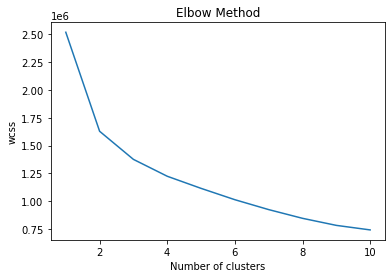

In [30]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [31]:
# Apply K-means clustering 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

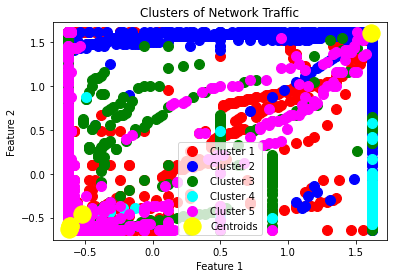

In [32]:
# Visualize the clusters
plt.scatter(X_scaled.iloc[y_kmeans == 0, 0], X_scaled.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled.iloc[y_kmeans == 1, 0], X_scaled.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled.iloc[y_kmeans == 2, 0], X_scaled.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled.iloc[y_kmeans == 3, 0], X_scaled.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled.iloc[y_kmeans == 4, 0], X_scaled.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Network Traffic')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### Comparison and Performance Evaluation

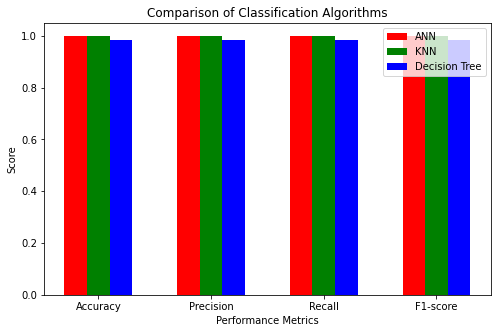

In [33]:
# Set up the bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ind = np.arange(4)
width = 0.2
#Plot the data
ann = ax.bar(ind, [ANN_accuracy, ANN_precision, ANN_recall, ANN_f1], width, color='r', label='ANN')
knn = ax.bar(ind + width, [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1], width, color='g', label='KNN')
dt = ax.bar(ind + 2*width, [DTC_accuracy, DTC_precision, DTC_recall, DTC_f1], width, color='b', label='Decision Tree')

# Add x-axis and y-axis labels
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Score')

# Add title and legend
ax.set_title('Comparison of Classification Algorithms')
ax.legend()

# Add x-axis ticks and labels
ax.set_xticks(ind + width)
ax.set_xticklabels(('Accuracy', 'Precision', 'Recall', 'F1-score'))

# Show the plot
plt.show()